# Data Extraction


## Import data from website

#get the data from the site and unzip the contents to battery_data
!wget -cq https://ti.arc.nasa.gov/c/5 -O naza.zip
!unzip -qqo naza.zip -d battery_data
!pip install ipyfilechooser #widget to choose files or location on a desktop

## Import libraries

In [1]:
import os
import scipy.io as sio
import pandas as pd
from scipy.io import loadmat
import datetime
from pandas import DataFrame
from IPython.display import display
from ipyfilechooser import FileChooser

## Input from user

In [3]:
print("Input which battery you need to extract data from. Choose from the following")
print("Battery Number: B0005,B0006,B0007,B0018")
# B = input()
B = 'B0056'
B

Input which battery you need to extract data from. Choose from the following
Battery Number: B0005,B0006,B0007,B0018


'B0056'

In [4]:
#define a function for extracting discharge and charge data
def disch_data(battery):
  mat = loadmat('battery_data/' + 'datasets/' + battery + '.mat') #get the .mat file
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0])) #get the length of the data from number of cycles
  c = 0 #set a variable to zero
  disdataset = [] #create an empty list for discharge data
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i] #get each row of the cycle
    if row['type'][0] == 'discharge': #if the row is a dicharge cycle
      ambient_temperature = row['ambient_temperature'][0][0] #get temp,date_time stamp,capacity,voltage,current etc,.
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        disdataset.append([c + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
        capacity_data.append([c + 1, ambient_temperature, date_time, capacity])
      c = c + 1
  print(disdataset[0])
  return [pd.DataFrame(data=disdataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current', 'voltage', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]

def charge_data(battery): #similarly write a fn for charge data
  mat = loadmat('battery_data/' + 'datasets/' + battery + '.mat') #get the .mat file
  c = 0
  chdataset = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'charge' :
            
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_charge = data[0][0]['Current_charge'][0][j]
        voltage_charge = data[0][0]['Voltage_charge'][0][j]
        time = data[0][0]['Time'][0][j]
        chdataset.append([c + 1, ambient_temperature, date_time,
                        voltage_measured, current_measured,
                        temperature_measured, current_charge,
                        voltage_charge, time])
      c = c + 1
  print(chdataset[788])
  return chdataset

## Charge cycles

In [5]:
chdataset = charge_data(B)
chdf=pd.DataFrame(data=chdataset,columns=['cycle', 'ambient_temperature', 'datetime', 
                                'voltage_measured','current_measured',
                                'temperature_measured','current',
                                'voltage', 'time'])
pd.set_option('display.max_columns', 10)
chdf

[1, 4, datetime.datetime(2010, 9, 3, 13, 31, 57), 4.19766645301395, 1.1400676813379569, 4.8839950470477485, 1.1449, 4.816, 2113.078]


,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,1,4,2010-09-03 13:31:57,3.682072,-0.001119,5.936651,0.0001,-0.010,0.000
1,1,4,2010-09-03 13:31:57,3.999290,1.496383,5.943098,1.5017,4.803,2.531
2,1,4,2010-09-03 13:31:57,4.006730,1.494709,5.940607,1.5017,4.816,4.985
3,1,4,2010-09-03 13:31:57,4.012289,1.496769,5.942540,1.5017,4.816,7.469
4,1,4,2010-09-03 13:31:57,4.017308,1.495099,5.969376,1.5017,4.829,9.985
...,...,...,...,...,...,...,...,...,...
236618,102,4,2010-09-30 12:31:10,4.189499,0.032468,6.679135,0.0335,4.208,10777.672
236619,102,4,2010-09-30 12:31:10,4.189546,0.031131,6.691044,0.0340,4.208,10784.047
236620,102,4,2010-09-30 12:31:10,4.189108,0.034179,6.699847,0.0335,4.208,10790.547
236621,102,4,2010-09-30 12:31:10,4.189431,0.033204,6.699892,0.0330,4.208,10796.969


In [6]:
chdf.describe()

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current,voltage,time
count,236623.000000,236623.0,236623.000000,236623.000000,236623.000000,236623.000000,236623.000000,236623.000000
mean,45.608926,4.0,4.183760,0.410660,6.196658,0.412556,4.400742,5339.076063
std,29.647112,0.0,0.025553,0.466989,1.055602,0.467864,0.279359,3142.730028
min,1.000000,4.0,3.682072,-0.015390,3.195352,0.000100,-0.010000,0.000000
25%,19.000000,4.0,4.187612,0.079069,5.619038,0.080400,4.233000,2605.297000
50%,43.000000,4.0,4.188492,0.180844,6.266675,0.181700,4.284000,5321.188000
75%,70.000000,4.0,4.189836,0.590877,6.693002,0.593000,4.512000,8061.937500
max,102.000000,4.0,4.201170,1.506098,10.584467,1.502300,4.993000,10808.032000


## Discharge cycles

In [7]:
disdf,capacity = disch_data(B)
pd.set_option('display.max_columns', 10)
disdf

Total data in dataset:  252
[1, 4, datetime.datetime(2010, 9, 3, 12, 10, 27), 0.7852781208785192, 3.8387228819147694, -0.0011888926715630254, 6.293379384392066, 0.0004, 0.0, 0.0]


,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current,voltage,time
0,1,4,2010-09-03 12:10:27,0.785278,3.838723,-0.001189,6.293379,0.0004,0.000,0.000
1,1,4,2010-09-03 12:10:27,0.785278,3.838476,0.000195,6.307099,0.0004,3.853,9.438
2,1,4,2010-09-03 12:10:27,0.785278,3.309743,-1.993708,6.355489,1.9982,2.183,19.578
3,1,4,2010-09-03 12:10:27,0.785278,3.280056,-1.993404,6.439268,1.9982,2.175,28.938
4,1,4,2010-09-03 12:10:27,0.785278,3.255598,-1.994241,6.561227,1.9982,2.156,38.281
...,...,...,...,...,...,...,...,...,...,...
22657,102,4,2010-09-30 11:50:17,1.129059,3.722741,-0.002669,11.432024,0.0004,0.000,2304.750
22658,102,4,2010-09-30 11:50:17,1.129059,3.724128,-0.003104,11.310875,0.0006,0.000,2317.984
22659,102,4,2010-09-30 11:50:17,1.129059,3.725061,-0.001345,11.176975,0.0004,0.000,2331.187
22660,102,4,2010-09-30 11:50:17,1.129059,3.726110,0.000979,11.037694,0.0004,0.000,2344.468


In [8]:
disdf.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current,voltage,time
count,22662.000000,22662.0,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000,22662.000000
mean,47.895067,4.0,1.181234,3.350477,-1.708804,10.363773,1.712854,1.932527,1242.110961
std,29.539242,0.0,0.070199,0.272369,0.697384,2.088567,0.699053,0.815128,725.266813
min,1.000000,4.0,0.785278,2.680335,-1.999483,3.424939,0.000400,0.000000,0.000000
25%,22.000000,4.0,1.139725,3.184115,-1.994139,9.099020,1.998200,1.942000,615.831750
50%,46.000000,4.0,1.179006,3.359163,-1.993208,10.476892,1.998200,2.218000,1238.039000
75%,73.000000,4.0,1.227201,3.541346,-1.992049,11.771621,1.998200,2.377000,1861.043000
max,102.000000,4.0,1.344356,4.182137,0.007493,15.737541,1.998400,4.198000,2826.000000


## Combined data

In [9]:
cycling_data = pd.concat([chdf, disdf])
cycling_data=cycling_data.sort_values(['cycle'], ascending=[True])
cycling_data

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current,voltage,time,capacity
0,1,4,2010-09-03 13:31:57,3.682072,-0.001119,5.936651,0.0001,-0.010,0.000,NaN
2656,1,4,2010-09-03 13:31:57,4.188248,0.104096,5.333886,0.1084,4.246,7645.719,NaN
2657,1,4,2010-09-03 13:31:57,4.188200,0.107161,5.339407,0.1084,4.246,7648.672,NaN
2658,1,4,2010-09-03 13:31:57,4.188270,0.106347,5.350900,0.1073,4.246,7651.610,NaN
2659,1,4,2010-09-03 13:31:57,4.188126,0.104366,5.364342,0.1079,4.246,7654.610,NaN
...,...,...,...,...,...,...,...,...,...,...
235799,102,4,2010-09-30 12:31:10,4.188940,0.152524,6.138060,0.1548,4.271,5529.063,NaN
235800,102,4,2010-09-30 12:31:10,4.188886,0.153844,6.151620,0.1548,4.271,5535.438,NaN
235801,102,4,2010-09-30 12:31:10,4.189062,0.154229,6.152281,0.1553,4.271,5541.813,NaN
235783,102,4,2010-09-30 12:31:10,4.188186,0.155089,6.013897,0.1559,4.271,5427.032,NaN


In [13]:
#Choose test data file
#import libraries

print("Select the test file folder location: ")

# Create a FileChooser widget
Explorer = FileChooser('/Users/argon/documents/UTS/AI Capstone/AI Project')
# Explorer = os.path('\Users\argon\documents\UTS\AI Capstone\AI Project\dataframes')

#display the FileChooser widget
display(Explorer)

Select the test file folder location: 


FileChooser(path='C:\Users\argon\Documents\UTS\AI Capstone\AI Project', filename='', title='', show_hidden=Fal…

In [14]:
#save the df as csv in the selected location
cycling_data.to_csv(Explorer.selected + "NASA_cycle_dataset_" + B + ".csv")

## Voltage plot

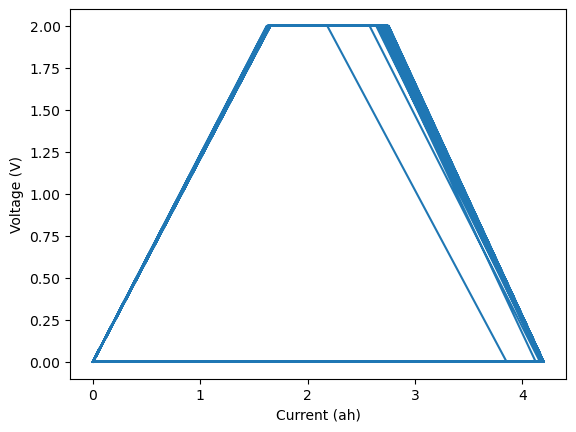

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(disdf['voltage'], disdf['current'], '-')
plt.ylabel('Voltage (V)')
plt.xlabel('Current (ah)')
plt.show()